# SD211 TP3 Restauration d'image à l'aide de l'ADMM

<p>Author: Rui SONG</p>
<p>Date: 23 Juin 2017</p>

## 0. Import et initialisations 

In [124]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## 1. Altération d'une image

#### Manipulation 1.

[u'H', u'observations', u'T', u'original']


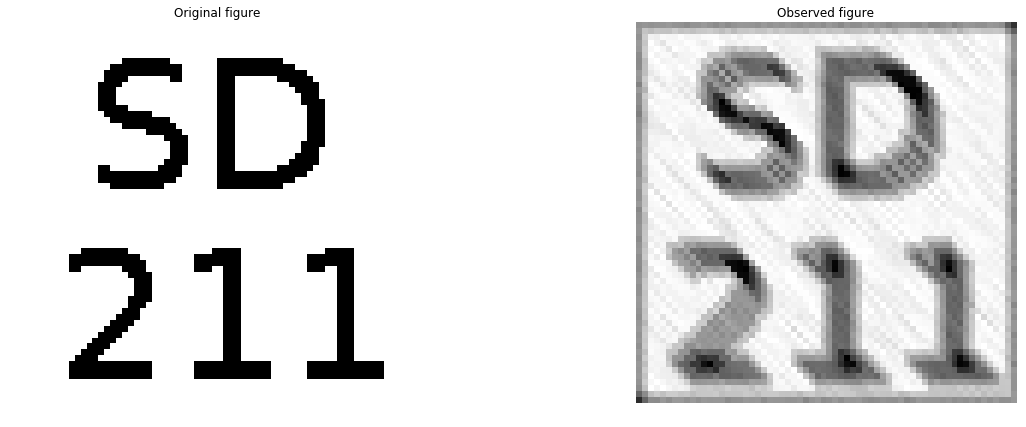

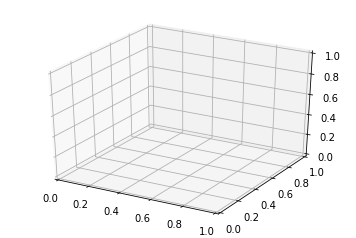

In [113]:
# Ouvrir des données stockées dans un fichier .pk
data = pickle.load(open('data.pk','rb'))
print data.keys()

# Charger par exemple la matrice H 
original = data['original']
H = data['H']
observations = data['observations']
T = data['T']

# Sauvegarder des données dans un fichier .pk
# pickle.dump({'obj1': obj1, 'obj2':obj2}, open('filename.pk','wb'), pickle.HIGHEST_PROTOCOL)

plt.figure(1, figsize=(20, 7))
plt.subplot(121)
plt.axis("off")
plt.imshow(original, cmap='gray')
plt.title("Original figure")
plt.subplot(122)
plt.axis("off")
plt.imshow(observations, cmap='gray')
plt.title("Observed figure")
plt.show()

## 2. Restauration d'image

#### Préparation 1.

Notons deux matrices diagonales $M_{1}, M_{2} \in \mathbb{R}^{(3P-K-L)\times(3P-K-L)}$:

$$
\begin{align}
& M_{1} = diag(\underbrace{1,...,1}_{P}, \underbrace{0,...,0}_{2P-K-L}) \\
& M_{2} = diag(\underbrace{0,...,0}_{P}, \underbrace{1,...,1}_{2P-K-L})
\end{align}
$$

Alors
$$
\begin{align}
& \underset{\mathbf{x}}{\text{min}}\ \frac{1}{2}\|\mathbf{y}-\mathbf{Hx}\|_2^2 + \beta\|\mathbf{Tx}\|_1 + \mathbf{\iota}_{[0,1]^P}(\mathbf{x}) \\
=\ & \underset{\mathbf{x}}{\text{min}}\ \frac{1}{2}\|\mathbf{y}-\mathbf{Hx}\|_2^2 + \beta\|M_{2}\mathbf{z}\|_1 + \mathbf{\iota}_{[0,1]^P}(M_{1}\mathbf{z}) \\
=\ & \underset{\mathbf{x}}{\text{min}}\ f(\mathbf{x}) + g(\mathbf{z})
\end{align}
$$
où 
$$
f(\mathbf{x}) = \frac{1}{2}\|\mathbf{y}-\mathbf{Hx}\|_2^2
$$
$$
g(\mathbf{z}) = \beta\|M_{2}\mathbf{z}\|_1 + \mathbf{\iota}_{[0,1]^P}(M_{1}\mathbf{z})
$$

La matrice $A$ est:
$A = 
\begin{pmatrix}
\mathbf{I}_{P} \\
\mathbf{T}
\end{pmatrix} \in \mathbb{R}^{(3P-K-L)\ \times\ P}$.

#### Préparation 2.

Le Lagrangien augmenté $\mathcal{L}_{\rho}$ du problème est:
$$
\begin{align}
\mathcal{L}_{\rho}(\mathbf{x}, \mathbf{z}, \mathbf{\gamma}) =\ & \frac{1}{2}\|\mathbf{y}-\mathbf{Hx}\|_2^2 + \beta||\mathbf{z_{1}}||_{1} + \mathbf{\iota}_{[0,1]^P}(\mathbf{z_{2}})+ \mathbf{\gamma}^{T}(A\mathbf{x}-\mathbf{z}) + \frac{\rho}{2}||A\mathbf{x} - \mathbf{z}||^{2}_{2} \\
=\ & \frac{1}{2}\|\mathbf{y}-\mathbf{Hx}\|_2^2 + \beta||\mathbf{z_{1}}||_{1} + \mathbf{\iota}_{[0,1]^P}(\mathbf{z_{2}})+ \mathbf{\gamma_{1}}^{T}(\mathbf{x}-\mathbf{z_{1}}) + \mathbf{\gamma_{2}}^{T}(T\mathbf{x}-\mathbf{z_{2}}) + \frac{\rho}{2}||\mathbf{x} - \mathbf{z_{1}}||^{2}_{2} + \frac{\rho}{2}||T\mathbf{x} - \mathbf{z_{2}}||^{2}_{2}
\end{align}
$$

#### Préparation 3.

Selon la règle de Fermat:
$$
\mathbf{x^{k+1}} \in \{\mathbf{x} | \nabla_x\mathcal{L}_{\rho}=0 \}
$$

$$
\nabla_x\mathcal{L}_{\rho} = \mathbf{H}^T(\mathbf{Hx-y}) + \gamma_1 + \mathbf{T}^T\gamma_2 + \rho(\mathbf{x}-\mathbf{z}_1) + \rho\mathbf{T}^T(\mathbf{Tx}-\mathbf{z}_2)
$$
Donc,
$$
\mathbf{x}^{k+1} = (\mathbf{H}^T\mathbf{H} + \rho\mathbf{I}_P + \rho\mathbf{T}^T\mathbf{T})^{-1}(\mathbf{H}^T\mathbf{y} + \rho\mathbf{z}_1^k + \rho\mathbf{T}^T\mathbf{z}_2^k - \gamma_1^k - \mathbf{T}^T\gamma_2^k)
$$

#### Préparation 4.

$$
\mathbf{z}_1^{k+1} = \text{arg}\ \underset{\mathbf{z}_1}{\text{min}}\ \mathcal{L}_\rho =\text{arg}\ \underset{\mathbf{z}_1 \in [0,1]^P}{\text{min}}\ \mathbf{\gamma^{k}}_1^T(\mathbf{x}^{k+1}-\mathbf{z}_1) + \frac{\rho}{2}\|\mathbf{x}^{k+1}-\mathbf{z}_1\|_2^2
$$

Si $\mathbf{z}_1^{k+1} \in [0,1]^P$, la dérivé de $\mathcal{L}_\rho$ au point $\mathbf{z}_1^{k+1}$ est zéro,
$$
\mathbf{z}_1 = \frac{\mathbf{\gamma}_1^{k}}{\rho} + \mathbf{x}^{k+1}
$$

Donc, 
$$
\mathbf{z}_1^{k+1} = \text{max}(\mathbf{0}^P,\ \text{min}(\mathbf{1}^P,\ \frac{\mathbf{\gamma}_1^k}{\rho} + \mathbf{x}^{k+1})
$$

$$
\mathbf{z}_2^{k+1} = \text{arg}\ \underset{\mathbf{z}_2}{\text{min}}\ \mathcal{L}_\rho = \text{arg}\ \underset{\mathbf{z}_2}{\text{min}}\ \beta\|\mathbf{z}_2\|_1 + \mathbf{\gamma}_2^T(\mathbf{Tx}-\mathbf{z}_2) + \frac{\rho}{2}\|\mathbf{Tx}-\mathbf{z}_2\|_2^2
$$

Notons,
$$
h_1(\mathbf{z}_2) = \beta \|\mathbf{z}_2\|_1
$$
$$
h_2(\mathbf{z}_2) = \mathbf{\gamma}_2^T(\mathbf{Tx}-\mathbf{z}_2) + \frac{\rho}{2}\|\mathbf{Tx}-\mathbf{z}_2\|_2^2
$$

On peut obtenir $\mathbf{z}_2^{k+1}$ en utilisant la méthode du gradient proximal:
$$
\|\nabla_{\mathbf{z}_2} h_2 (\mathbf{y}) - \nabla_{\mathbf{z}_2} h_2 (\mathbf{x})\|  \leq \rho\|\mathbf{y}- \mathbf{x}\|
$$
Donc, on peut prendre $\frac{1}{\rho}$ comme le pas pour l'algorithme du gradient proximal:
$$
\begin{aligned}
\mathbf{z}_2^{k+1} &= \text{prox}_{\frac{1}{\rho}h_1} (\mathbf{z}_2^k - \frac{1}{\rho} \nabla_{\mathbf{z}_2} h_2(\mathbf{z}_2^k)) \\
&= \mathcal{S}_{\frac{\beta}{\rho}} (\mathbf{T}\mathbf{x}^{k+1} + \frac{\mathbf{\gamma}_2^k}{\rho})
\end{aligned}
$$

#### Préparation 5.

$$\mathbf{\gamma}_1^{k+1} = \mathbf{\gamma}_1^k + \rho(\mathbf{x}^{k+1} - \mathbf{z}_1^{k+1})$$
$$\mathbf{\gamma}_2^{k+1} = \mathbf{\gamma}_2^k + \rho(\mathbf{T}\mathbf{x}^{k+1} - \mathbf{z}_2^{k+1})$$

## 3. Implémentation de l'ADMM pour résoudre le problème de restauration d'image

#### Manipulation 2.

In [46]:
def seuillage_doux(z, seuil):
    if (z > seuil):
        z -= seuil
    elif (z < -seuil):
        z += seuil
    else:
        z = 0
    return z

def ADMM(y, H, T, rho, beta, kmax, original):
    x = np.zeros_like(y)
    z1 = x
    z2 = T.dot(x)
    gamma1 = np.zeros_like(z1)
    gamma2 = np.zeros_like(z2)
    L = np.zeros(kmax)
    Biais = np.zeros(kmax)
    EQM = np.zeros(kmax)
    
    for k in range(kmax):
        x, i = cg(H.T.dot(H) + rho*np.identity(x.shape[0]) + rho*T.T.dot(T), H.T.dot(y) + rho*z1 + rho*T.T.dot(z2) - gamma1 - T.T.dot(gamma2))
        if i != 0:
            print "Can't get x^(k+1) !"
            return
        z1 = gamma1/rho + x
        for i in range(len(z1)):
            z1[i] = max(0, min(1, z1[i]))
        z2 = T.dot(x) + gamma2/rho
        for i in range(len(z2)):
            z2[i] = seuillage_doux(z2[i], beta/rho)
        gamma1 = gamma1 + rho*(x - z1)
        gamma2 = gamma2 + rho*(T.dot(x) - z2)
        L[k] = np.sum((H.dot(x)-y)*(H.dot(x)-y))/2.+beta*np.sum(np.fabs(z2))+np.sum(gamma1*(x-z1)) + np.sum(gamma2*(T.dot(x)-z2)) + \
            rho*np.sum((x-z1)*(x-z1))/2. + rho*np.sum((T.dot(x)-z2)*(T.dot(x)-z2))/2.
        Biais[k] = np.mean(np.fabs(x-original))
        EQM[k] = np.mean((x-original)*(x-original))
    return x, L, Biais, EQM

In [47]:
rho = 0.05
beta = 0.01
kmax = 100

K, L = observations.shape
y0 = np.reshape(observations, K*L)
x0 = np.reshape(original, K*L)
x, Lmin, Biais, EQM = ADMM(y0, H, T, rho, beta, kmax, x0)

In [48]:
restauration = x.reshape((K, L))

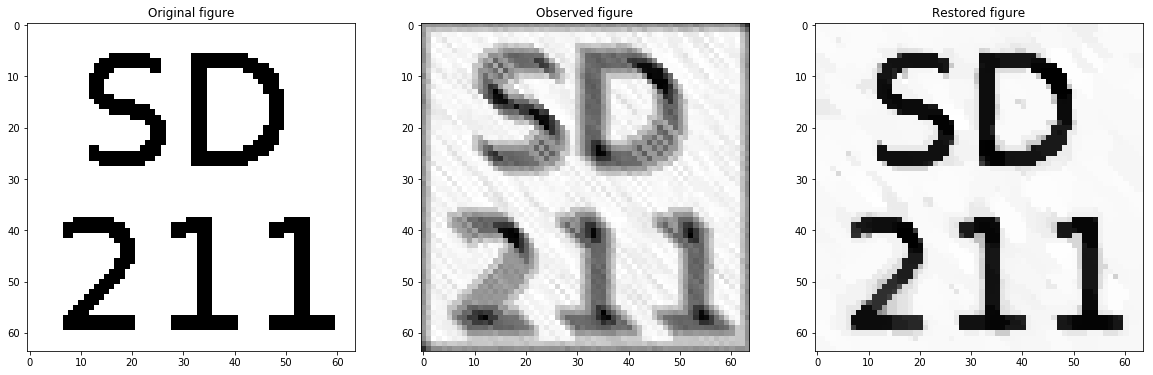

In [49]:
plt.figure(2, figsize=(20, 7))
plt.subplot(131)
plt.imshow(original, cmap='gray')
plt.title("Original figure")
plt.axis("off")
plt.subplot(132)
plt.imshow(observations, cmap='gray')
plt.title("Observed figure")
plt.axis("off")
plt.subplot(133)
plt.imshow(restauration, cmap='gray')
plt.title("Restored figure")
plt.axis("off")
plt.show()

#### Manipulation 3.

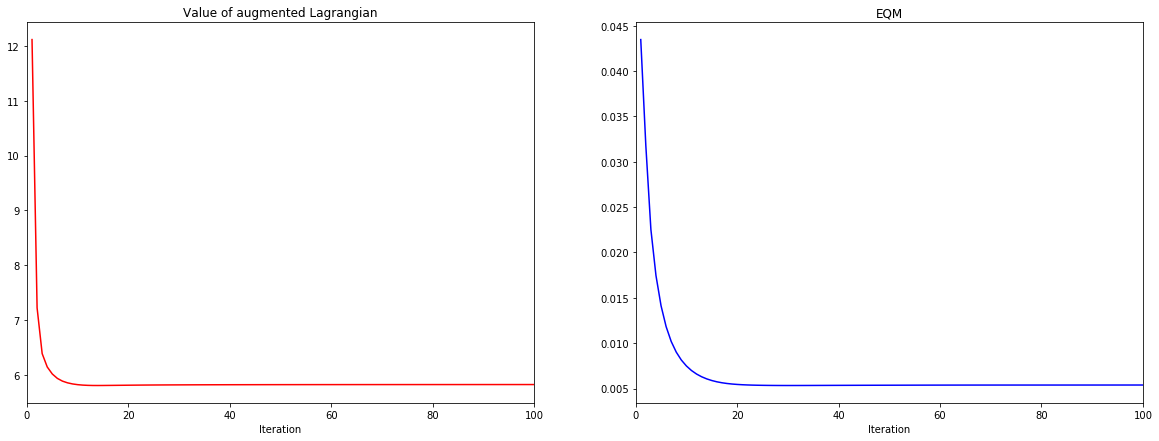

In [50]:
ite = range(1, kmax+1)

plt.figure(3, figsize=(20, 7))
plt.subplot(121)
plt.title("Value of augmented Lagrangian")
plt.plot(ite, Lmin, c='r')
plt.xlabel("Iteration")
plt.xlim(0, 100)
plt.subplot(122)
plt.title("EQM")
plt.plot(ite, EQM, c='b')
plt.xlabel("Iteration")
plt.xlim(0, 100)
plt.show()

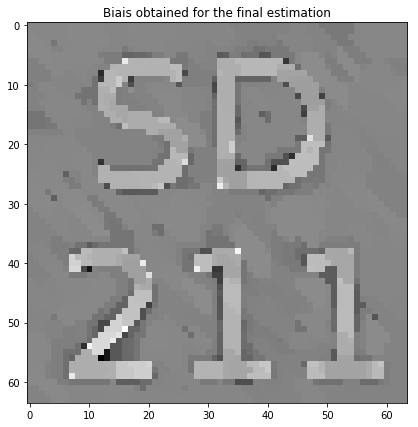

In [52]:
plt.figure(4, figsize=(20, 7))
plt.imshow(restauration-original, cmap='gray')
plt.title("Biais obtained for the final estimation")
plt.axis("off")
plt.show()

#### Manipulation 4.

In [106]:
def ADMM2(y, H, T, rho, beta, kmax, original, tol = 1e-4):
    x = np.zeros_like(y)
    z1 = x
    z2 = T.dot(x)
    gamma1 = np.zeros_like(z1)
    gamma2 = np.zeros_like(z2)
    L0 = 0
    Biais = 0
    EQM = 0
    
    for k in range(kmax):
        x, i = cg(H.T.dot(H) + rho*np.identity(x.shape[0]) + rho*T.T.dot(T), H.T.dot(y) + rho*z1 + rho*T.T.dot(z2) - gamma1 - T.T.dot(gamma2))
        if i != 0:
            print "Can't get x^(k+1) !"
            return
        z1 = gamma1/rho + x
        for i in range(len(z1)):
            z1[i] = max(0, min(1, z1[i]))
        z2 = T.dot(x) + gamma2/rho
        for i in range(len(z2)):
            z2[i] = seuillage_doux(z2[i], beta/rho)
        gamma1 = gamma1 + rho*(x - z1)
        gamma2 = gamma2 + rho*(T.dot(x) - z2)
        L = np.sum((H.dot(x)-y)*(H.dot(x)-y))/2.+beta*np.sum(np.fabs(z2))+np.sum(gamma1*(x-z1)) + np.sum(gamma2*(T.dot(x)-z2)) + \
            rho*np.sum((x-z1)*(x-z1))/2. + rho*np.sum((T.dot(x)-z2)*(T.dot(x)-z2))/2.
        if ((k > 0) and ( L0-L <= tol)):
            break 
        L0 = L
    Biais = np.mean(np.fabs(x-original))
    EQM = np.mean((x-original)*(x-original))
    return x, L, Biais, EQM, k

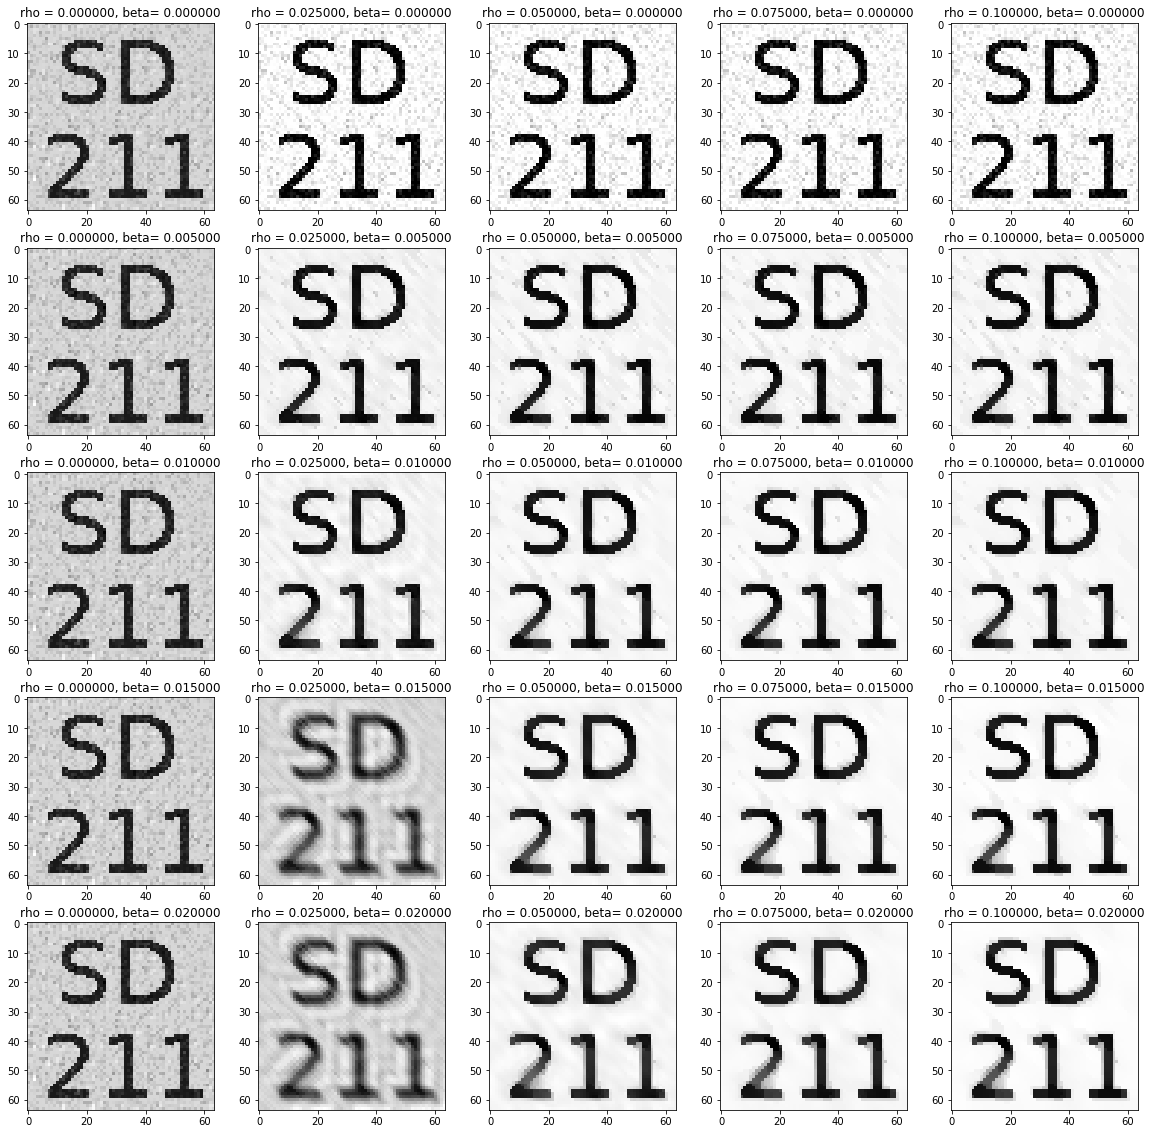

In [109]:
num = 5
rhos = np.linspace(start = 0, stop = 0.1, num = num, endpoint = True)
rhos[0] = np.finfo(float).eps
betas = np.linspace(start = 0, stop = 0.02, num = num, endpoint = True)
Ls = np.zeros((num, num))
Biaiss = np.zeros((num, num))
EQMs = np.zeros((num, num))
ks = np.zeros((num, num))

plt.figure(5, figsize=(20, 20))
r, b = np.meshgrid(rhos, betas)
for i in range(num):
    for j in range(num):
        rho_ = r[i][j]
        beta_ = b[i][j]
        x_, Lmin_, Biais_, EQM_, k_ = ADMM2(y0, H, T, rho_, beta_, kmax, x0)
        Ls[i][j] = Lmin_
        Biaiss[i][j] = Biais_
        EQMs[i][j] = EQM_
        ks[i][j] = k_
        plt.subplot(num, num, i*num+j+1)
        plt.title("rho = %f, beta= %f" %(rho_, beta_))
        plt.axis("off")
        plt.imshow(x_.reshape(K, L),cmap='gray')
plt.show()

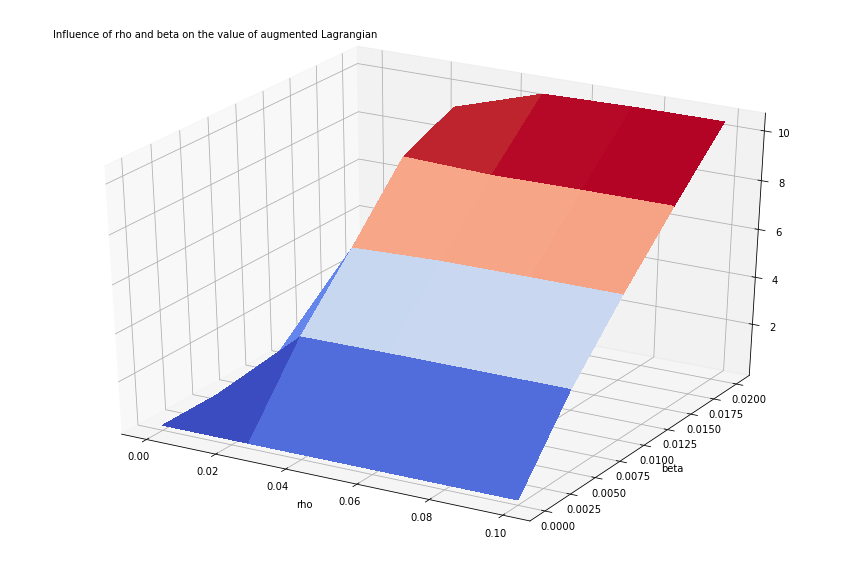

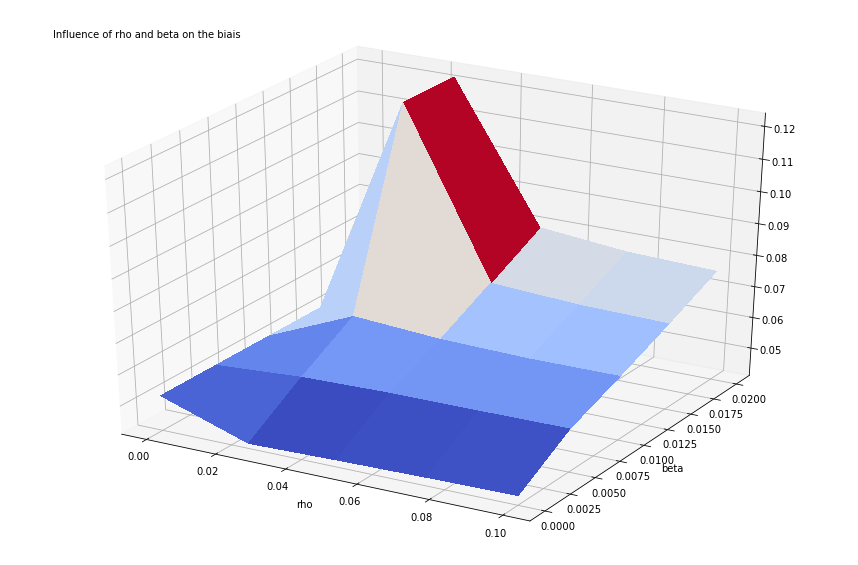

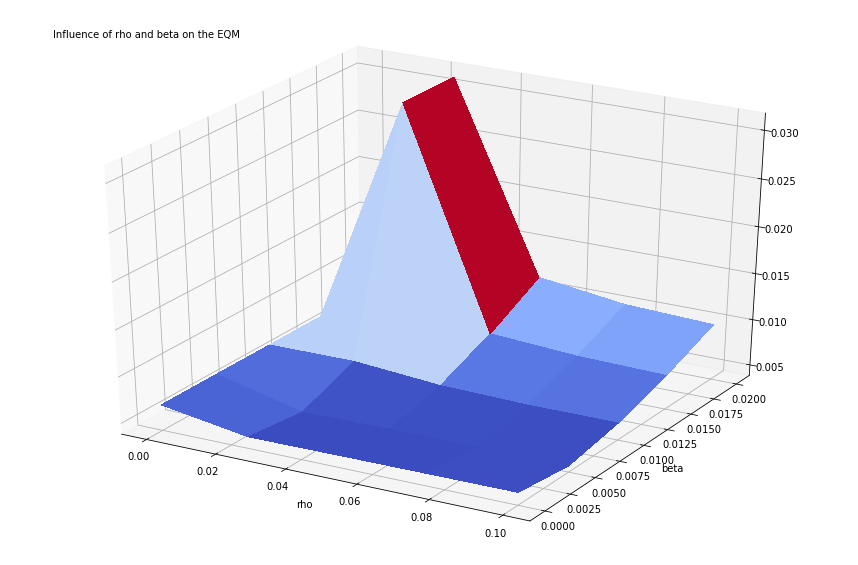

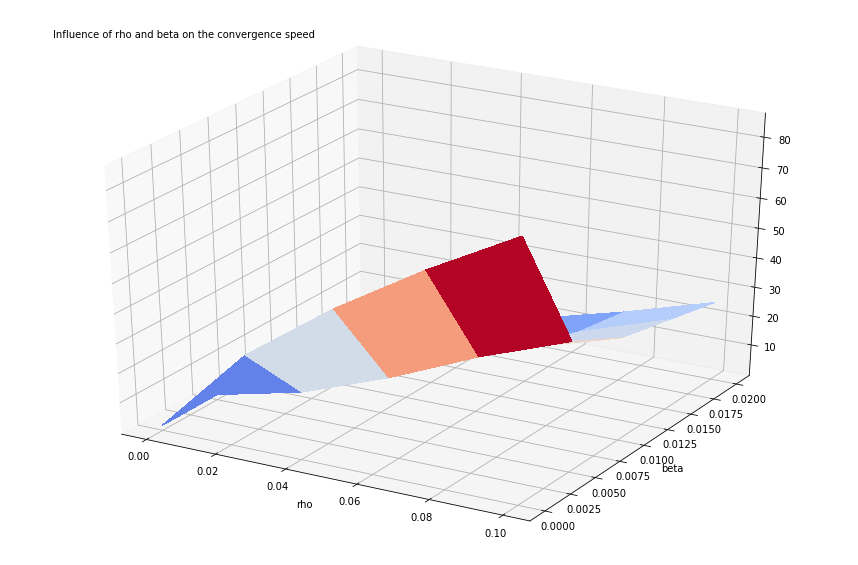

In [121]:
fig = plt.figure(6,figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(r, b, Ls, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.text2D(0.05, 0.95, "Influence of rho and beta on the value of augmented Lagrangian", transform=ax.transAxes)
ax.set_xlabel("rho")
ax.set_ylabel("beta")
plt.show()
fig = plt.figure(7,figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(r, b, Biaiss, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.text2D(0.05, 0.95, "Influence of rho and beta on the biais", transform=ax.transAxes)
ax.set_xlabel("rho")
ax.set_ylabel("beta")
plt.show()
fig = plt.figure(8,figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(r, b, EQMs, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.text2D(0.05, 0.95, "Influence of rho and beta on the EQM", transform=ax.transAxes)
ax.set_xlabel("rho")
ax.set_ylabel("beta")
plt.show()
fig = plt.figure(9,figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(r, b, ks, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.text2D(0.05, 0.95, "Influence of rho and beta on the convergence speed", transform=ax.transAxes)
ax.set_xlabel("rho")
ax.set_ylabel("beta")
plt.show()

<p>Comme l'on peut voir dans les graphes au-dessus: avec l'augementation de la valeur de $\beta$, la restauration d'image est devenu de plus en plus flou, la valeur du Lagrangian augmenté, le biais et l'EQM augemente, la rapidité du convergence diminue; 
avec l'augmentation de la valeur de $\rho$, le bruit dans la restauration d'image diminue, la valeur du Lagrangian augmenté ne change pas beaucoup, le biais et l'EQM diminue, la rapidité du convergence augment.</p>
<p>Donc, on peut conclure que l'on doit choisir un $\rho$ assez grand, et un $\beta$ propre.</p>

## Pour allez plus loin

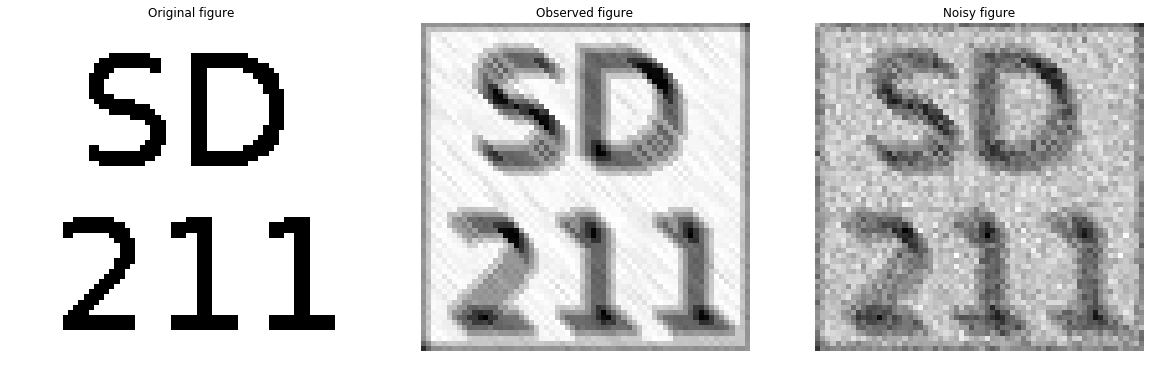

In [138]:
noisy = y0 + 0.1*np.random.randn(x0.shape[0])
plt.figure(10, figsize=(20, 7))
plt.subplot(131)
plt.axis("off")
plt.imshow(original, cmap='gray')
plt.title("Original figure")
plt.subplot(132)
plt.imshow(observations, cmap='gray')
plt.title("Observed figure")
plt.axis("off")
plt.subplot(133)
plt.axis("off")
plt.imshow(noisy.reshape(K, L),cmap='gray')
plt.title("Noisy figure")
plt.show()

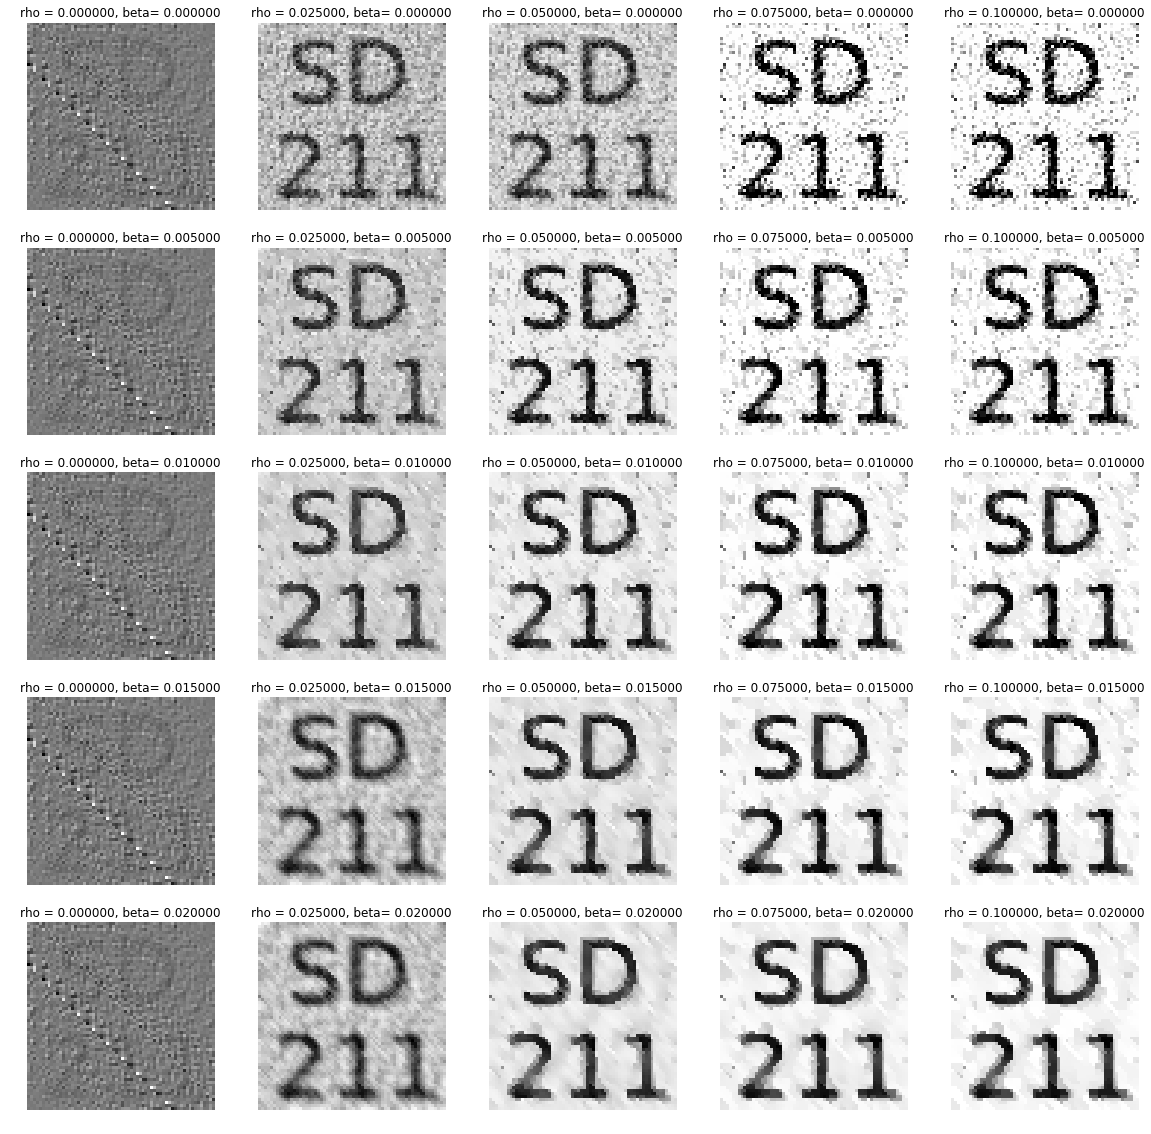

In [139]:
Ls = np.zeros((num, num))
Biaiss = np.zeros((num, num))
EQMs = np.zeros((num, num))
ks = np.zeros((num, num))

plt.figure(11, figsize=(20, 20))
r, b = np.meshgrid(rhos, betas)
for i in range(num):
    for j in range(num):
        rho_ = r[i][j]
        beta_ = b[i][j]
        x_, Lmin_, Biais_, EQM_, k_ = ADMM2(noisy, H, T, rho_, beta_, kmax, x0)
        Ls[i][j] = Lmin_
        Biaiss[i][j] = Biais_
        EQMs[i][j] = EQM_
        ks[i][j] = k_
        plt.subplot(num, num, i*num+j+1)
        plt.title("rho = %f, beta= %f" %(rho_, beta_))
        plt.axis("off")
        plt.imshow(x_.reshape(K, L),cmap='gray')
plt.show()